In [44]:
# -*- coding: utf-8 -*-
"""PyCaret Regression Tutorial - Bike Sharing Dataset"""

# Install PyCaret if needed
# %pip install pycaret[full]

# Check installed version
import pycaret
print(f"PyCaret version: {pycaret.__version__}")

# Import necessary libraries
import pandas as pd
from pycaret.regression import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

PyCaret version: 3.3.2


In [45]:
file_path = '/Users/pdheri/downloads/hour.csv'
# load csv file to notebook 

data = pd.read_csv(file_path)

# check the data starting rows
data[0:10]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14



Cleaned dataset shape: (17379, 13)
Remaining columns: ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']

Target variable 'cnt' statistics:
count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: cnt, dtype: float64


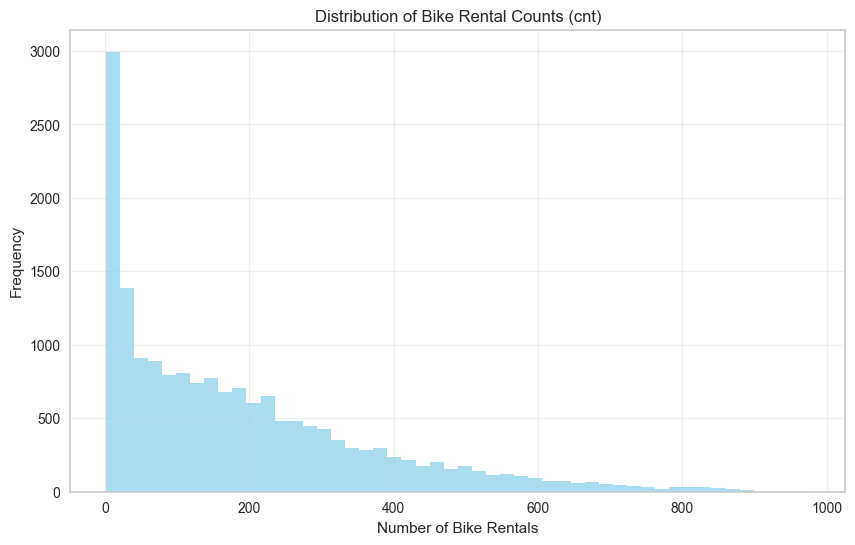

In [ ]:
data_cleaned = data.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)

data_cleaned[0:10]

print(f"\nCleaned dataset shape: {data_cleaned.shape}")
print(f"Remaining columns: {data_cleaned.columns.tolist()}")

# Check the target variable distribution
print(f"\nTarget variable 'cnt' statistics:")
print(data_cleaned['cnt'].describe())

plt.figure(figsize=(10, 6))
plt.hist(data_cleaned['cnt'], bins=50, alpha=0.7, color='skyblue')
plt.title('Distribution of Bike Rental Counts (cnt)')
plt.xlabel('Number of Bike Rentals')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:

# Initialize setup
print("Setting up PyCaret environment...")
# s = setup(data_cleaned, 
#           target='cnt', 
#           session_id=123)

# Explicitly define categorical and numerical features
s = setup(data_cleaned, 
          target='cnt', 
          session_id=123,
          categorical_features=['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit'],
          numeric_features=['temp', 'atemp', 'hum', 'windspeed'])
print("Setup completed successfully!")


Setting up PyCaret environment...


,Description,Value
0,Session id,123
1,Target,cnt
2,Target type,Regression
3,Original data shape,"(17379, 13)"
4,Transformed data shape,"(17379, 59)"
5,Transformed train set shape,"(12165, 59)"
6,Transformed test set shape,"(5214, 59)"
7,Numeric features,4
8,Categorical features,8
9,Preprocess,True


Setup completed successfully!


In [48]:

best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,28.3572,1939.4577,43.9727,0.9406,0.5173,0.6025,0.3780
et,Extra Trees Regressor,28.3325,2289.4824,47.6539,0.9298,0.3968,0.3901,0.7540
lightgbm,Light Gradient Boosting Machine,31.8388,2300.7627,47.8997,0.9296,0.5453,0.6599,0.3630
xgboost,Extreme Gradient Boosting,31.2557,2313.5550,48.0303,0.9292,0.5422,0.6446,0.0680
rf,Random Forest Regressor,33.1187,2792.8494,52.7501,0.9145,0.4857,0.5690,0.7320
dt,Decision Tree Regressor,44.3214,5734.5036,75.4889,0.8245,0.5839,0.6017,0.0430
gbr,Gradient Boosting Regressor,59.4645,6796.0909,82.3773,0.7917,0.8147,1.5180,0.2400
knn,K Neighbors Regressor,67.7478,10027.7728,100.0659,0.6930,0.9044,2.0863,0.0430
ridge,Ridge Regression,75.2100,10299.7005,101.4540,0.6843,1.0327,2.8897,0.0340
br,Bayesian Ridge,75.2068,10299.6365,101.4536,0.6843,1.0326,2.8880,0.0480


In [49]:
best = create_model('catboost') #choose catboost to avoid plot errors with some models

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,29.4470,1922.9868,43.8519,0.9386,0.5643,0.7140
1,27.9097,1881.8128,43.3799,0.9436,0.5121,0.6251
2,27.9806,1849.1026,43.0012,0.9447,0.4971,0.5663
3,28.5167,1959.1263,44.2620,0.9409,0.4906,0.5565
4,26.3805,1522.9335,39.0248,0.9485,0.5232,0.5922
5,28.0877,1903.5251,43.6294,0.9407,0.5215,0.5857
6,29.7514,2411.1864,49.1038,0.9283,0.5015,0.5684
7,27.3622,1838.8855,42.8822,0.9478,0.5243,0.6073
8,29.5101,2133.2667,46.1873,0.9330,0.5169,0.6049


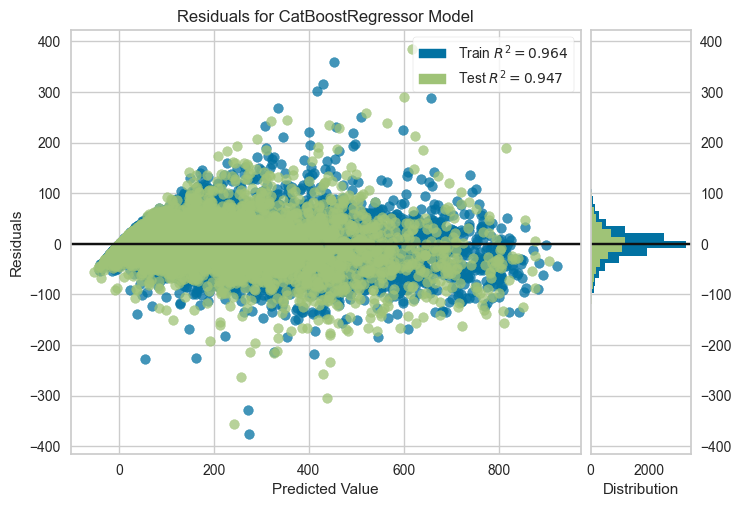

In [50]:
plot_model(best, plot = 'residuals')

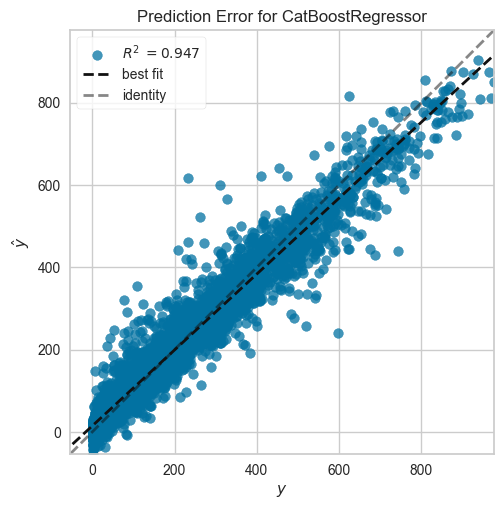

In [51]:
# plot error
plot_model(best, plot = 'error')

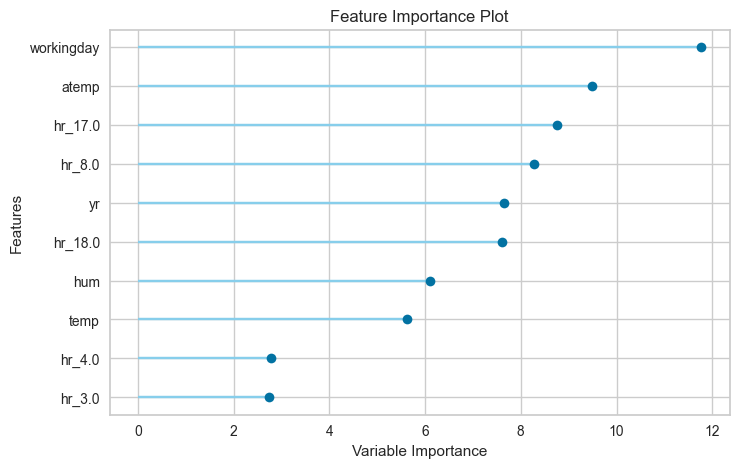

In [52]:
# plot feature importance
plot_model(best, plot = 'feature')

In [53]:
# predict on test set
holdout_pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,27.9575,1783.9677,42.2370,0.9466,0.5092,0.5831


In [54]:
# show predictions df
holdout_pred.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,prediction_label
5792,3,0,9,19,0,6,0,1,0.70,0.6667,0.74,0.1343,295,290.426510
7823,4,0,11,14,0,0,0,1,0.62,0.6212,0.43,0.4627,313,434.383148
15426,4,1,10,23,0,2,1,2,0.48,0.4697,0.77,0.0896,84,127.786476
15028,4,1,9,9,0,0,0,1,0.50,0.4848,0.51,0.3284,276,293.307739
12290,2,1,6,7,0,5,1,2,0.64,0.5758,0.89,0.1940,402,382.412987


In [55]:
# copy data and drop charges

new_data = data_cleaned.copy()
new_data.drop('cnt', axis=1, inplace=True)
new_data.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0


In [56]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,prediction_label
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,26.868163
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,20.285279
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,16.547362
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,6.988507
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1.917635


In [57]:
# save pipeline
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['temp', 'atemp', 'hum',
                                              'windspeed'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['season', 'yr', 'mnth', 'hr',
                                              'holiday', 'weekday', 'workingday',
                                              'weathersit'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_enco...
                                                                          'data_type': dtype('float64'),
                                                                          'mapping': 0.0    0
 1.0    1
 NaN   -1
 dtype: int64}]))),
                 ('onehot_encoding',
                  TransformerWrapper(include=['season', 'mnt

In [58]:
# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/var/folders/zm/57w_0t1n1xq379884kvyk1lm0000gn/T/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['temp', 'atemp', 'hum',
                                             'windspeed'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['season', 'yr', 'mnth', 'hr',
                                             'holiday', 'weekday', 'workingday',
                                             'weathersit'],
                                    transformer=S...
                                                                         'data_type': dtype('float64'),
                                                                         'mapping': 0.0    0
1.0    1
NaN   -1
dtype: int64}]))),
                ('onehot_encoding',
                 TransformerWrapper(include=['season', 'mnth', 'hr', 'weekday',
                                             'weathersit'],
                                    transformer=OneHotEncoder(cols=['season',
                                                                    'mnth',
                                                                    'hr',
                                                                    'weekday',
                                                                    'weathersit'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('trained_model',
                 <catboost.core.CatBoostRegressor object at 0x3697b8460>)])

In [59]:
s = setup(data_cleaned, target = 'cnt', session_id = 123, categorical_features=['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit'],
          numeric_features=['temp', 'atemp', 'hum', 'windspeed'])

,Description,Value
0,Session id,123
1,Target,cnt
2,Target type,Regression
3,Original data shape,"(17379, 13)"
4,Transformed data shape,"(17379, 59)"
5,Transformed train set shape,"(12165, 59)"
6,Transformed test set shape,"(5214, 59)"
7,Numeric features,4
8,Categorical features,8
9,Preprocess,True


In [60]:
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'transform_target_param',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [61]:
get_config('X_train_transformed')

,season_2.0,season_4.0,season_1.0,season_3.0,yr,mnth_3.0,mnth_11.0,mnth_12.0,mnth_4.0,mnth_6.0,...,weekday_5.0,workingday,weathersit_2.0,weathersit_1.0,weathersit_3.0,weathersit_4.0,temp,atemp,hum,windspeed
1859,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.34,0.3182,0.87,0.2537
7302,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.32,0.3485,0.66,0.0000
17094,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.32,0.3485,0.66,0.0000
17009,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.38,0.3939,0.82,0.1940
1636,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.44,0.4394,0.41,0.3582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.22,0.2273,0.47,0.1642
13435,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.74,0.6970,0.66,0.0896
7763,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.28,0.2879,0.81,0.1045
15377,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.38,0.3939,0.87,0.1343


In [62]:
# init setup with normalize = True
s = setup(data_cleaned, target = 'cnt', session_id = 123,
          normalize = True, normalize_method = 'minmax', categorical_features=['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit'],
          numeric_features=['temp', 'atemp', 'hum', 'windspeed'])

,Description,Value
0,Session id,123
1,Target,cnt
2,Target type,Regression
3,Original data shape,"(17379, 13)"
4,Transformed data shape,"(17379, 59)"
5,Transformed train set shape,"(12165, 59)"
6,Transformed test set shape,"(5214, 59)"
7,Numeric features,4
8,Categorical features,8
9,Preprocess,True


<Axes: >

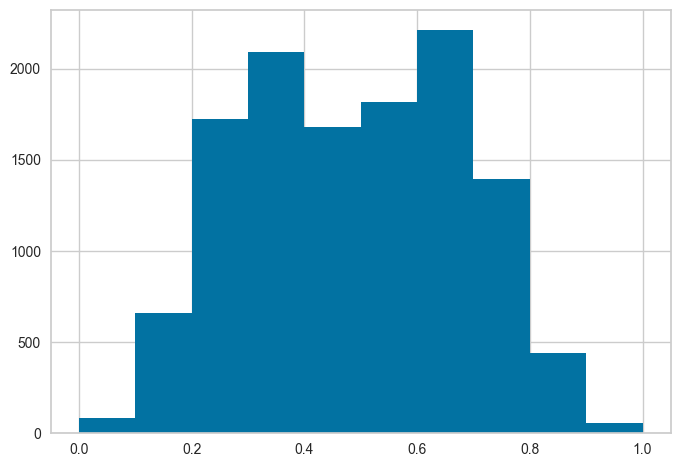

In [67]:
# lets check the X_train_transformed to see effect of params passed
get_config('X_train_transformed')['temp'].hist()

<Axes: >

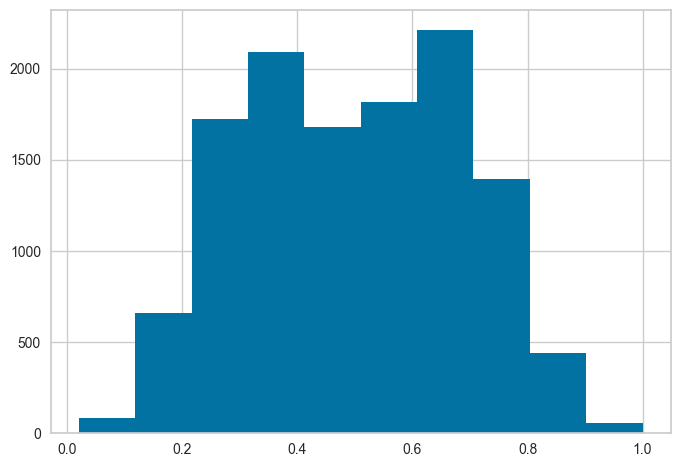

In [68]:
get_config('X_train')['temp'].hist()

In [69]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,28.3572,1939.4577,43.9727,0.9406,0.5173,0.6025,0.2940
et,Extra Trees Regressor,28.3325,2289.4824,47.6539,0.9298,0.3968,0.3901,0.9010
lightgbm,Light Gradient Boosting Machine,31.8388,2300.7627,47.8997,0.9296,0.5453,0.6599,0.3970
xgboost,Extreme Gradient Boosting,31.2557,2313.5550,48.0303,0.9292,0.5422,0.6446,0.0630
rf,Random Forest Regressor,33.1272,2794.1345,52.7633,0.9144,0.4857,0.5692,0.7600
dt,Decision Tree Regressor,44.3184,5727.2770,75.4441,0.8247,0.5839,0.6019,0.0550
gbr,Gradient Boosting Regressor,59.4645,6796.0909,82.3773,0.7917,0.8147,1.5180,0.2600
knn,K Neighbors Regressor,67.9651,10017.0816,100.0105,0.6933,0.9067,2.0856,0.0560
ridge,Ridge Regression,75.2098,10299.7060,101.4540,0.6843,1.0327,2.8897,0.0530
br,Bayesian Ridge,75.2065,10299.6410,101.4537,0.6843,1.0326,2.8880,0.0370


In [70]:
compare_tree_models = compare_models(include = ['dt', 'rf', 'et', 'gbr', 'xgboost', 'lightgbm', 'catboost'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,28.3572,1939.4577,43.9727,0.9406,0.5173,0.6025,0.3150
et,Extra Trees Regressor,28.3325,2289.4824,47.6539,0.9298,0.3968,0.3901,0.7950
lightgbm,Light Gradient Boosting Machine,31.8388,2300.7627,47.8997,0.9296,0.5453,0.6599,0.4430
xgboost,Extreme Gradient Boosting,31.2557,2313.5550,48.0303,0.9292,0.5422,0.6446,0.0690
rf,Random Forest Regressor,33.1272,2794.1345,52.7633,0.9144,0.4857,0.5692,0.8870
dt,Decision Tree Regressor,44.3184,5727.2770,75.4441,0.8247,0.5839,0.6019,0.0590
gbr,Gradient Boosting Regressor,59.4645,6796.0909,82.3773,0.7917,0.8147,1.5180,0.2560


In [71]:
compare_tree_models

In [72]:
compare_tree_models_results = pull()
compare_tree_models_results

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,28.3572,1939.4577,43.9727,0.9406,0.5173,0.6025,0.315
et,Extra Trees Regressor,28.3325,2289.4824,47.6539,0.9298,0.3968,0.3901,0.795
lightgbm,Light Gradient Boosting Machine,31.8388,2300.7627,47.8997,0.9296,0.5453,0.6599,0.443
xgboost,Extreme Gradient Boosting,31.2557,2313.5550,48.0303,0.9292,0.5422,0.6446,0.069
rf,Random Forest Regressor,33.1272,2794.1345,52.7633,0.9144,0.4857,0.5692,0.887
dt,Decision Tree Regressor,44.3184,5727.2770,75.4441,0.8247,0.5839,0.6019,0.059
gbr,Gradient Boosting Regressor,59.4645,6796.0909,82.3773,0.7917,0.8147,1.5180,0.256


In [73]:
best_mae_models_top3 = compare_models(sort = 'MAE', n_select = 3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,28.3325,2289.4824,47.6539,0.9298,0.3968,0.3901,0.8980
catboost,CatBoost Regressor,28.3572,1939.4577,43.9727,0.9406,0.5173,0.6025,0.3230
xgboost,Extreme Gradient Boosting,31.2557,2313.5550,48.0303,0.9292,0.5422,0.6446,0.0590
lightgbm,Light Gradient Boosting Machine,31.8388,2300.7627,47.8997,0.9296,0.5453,0.6599,0.4110
rf,Random Forest Regressor,33.1272,2794.1345,52.7633,0.9144,0.4857,0.5692,0.7740
dt,Decision Tree Regressor,44.3184,5727.2770,75.4441,0.8247,0.5839,0.6019,0.0510
gbr,Gradient Boosting Regressor,59.4645,6796.0909,82.3773,0.7917,0.8147,1.5180,0.2790
knn,K Neighbors Regressor,67.9651,10017.0816,100.0105,0.6933,0.9067,2.0856,0.0460
huber,Huber Regressor,72.1436,10754.2880,103.6612,0.6704,0.9720,2.4534,0.1000
par,Passive Aggressive Regressor,74.1206,11210.1257,105.8329,0.6565,0.9789,2.3666,0.0410


In [74]:
best_mae_models_top3

[ExtraTreesRegressor(n_jobs=-1, random_state=123),
 XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=-1, num_parallel_tree=None, ...)]

In [75]:
# check all the available models
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [76]:
# train linear regression with default fold=10
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,74.9312,9879.6702,99.3965,0.6848,1.0478,3.0036
1,73.5586,9627.1176,98.1179,0.7113,1.0021,2.6378
2,76.2162,10825.9324,104.0477,0.6760,1.0124,2.9813
3,77.5276,10727.6455,103.5743,0.6766,1.0407,3.0227
4,71.6030,9217.0609,96.0055,0.6881,1.0672,3.0747
5,75.3642,10356.6568,101.7677,0.6776,1.0200,2.7676
6,77.4635,10880.1408,104.3079,0.6763,1.0131,2.6456
7,74.5162,10426.2577,102.1090,0.7042,1.0478,2.9913
8,76.6678,10679.8622,103.3434,0.6644,1.0399,2.8210


In [77]:
lr_results = pull()
print(type(lr_results))
lr_results

<class 'pandas.core.frame.DataFrame'>


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,7.493120e+01,9.879670e+03,9.939650e+01,6.848000e-01,1.0478,3.003600e+00
1,7.355860e+01,9.627118e+03,9.811790e+01,7.113000e-01,1.0021,2.637800e+00
2,7.621620e+01,1.082593e+04,1.040477e+02,6.760000e-01,1.0124,2.981300e+00
3,7.752760e+01,1.072765e+04,1.035743e+02,6.766000e-01,1.0407,3.022700e+00
4,7.160300e+01,9.217061e+03,9.600550e+01,6.881000e-01,1.0672,3.074700e+00
5,7.536420e+01,1.035666e+04,1.017677e+02,6.776000e-01,1.0200,2.767600e+00
6,7.746350e+01,1.088014e+04,1.043079e+02,6.763000e-01,1.0131,2.645600e+00
7,7.451620e+01,1.042626e+04,1.021090e+02,7.042000e-01,1.0478,2.991300e+00
8,7.666780e+01,1.067986e+04,1.033434e+02,6.644000e-01,1.0399,2.821000e+00


In [80]:
# train linear regression with fold=3
lr = create_model('lr', fold=3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,74.8695,10176.0803,100.8766,0.6892,1.0217,2.9337
1,75.8882,10336.6936,101.6695,0.6763,1.0386,2.8541
2,400240460.8128,649580044868382228480.0000,25486860239.5113,-19479499156070488.0000,1.1188,17401758.8371
Mean,133413537.1902,216526681622794076160.0000,8495620147.3525,-6493166385356829.0000,1.0597,5800588.2083
Std,188675127.0968,306214969766596575232.0000,12014621089.9343,9182723964916716.0000,0.0424,8203266.4213


In [79]:
# train linear regression with specific model parameters
create_model('lr', fit_intercept = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,74.8990,9899.1237,99.4943,0.6841,1.0467,2.9907
1,73.3722,9643.3325,98.2005,0.7108,0.9963,2.6034
2,76.4747,10875.0760,104.2836,0.6745,1.0142,3.0062
3,77.5474,10739.9923,103.6339,0.6763,1.0414,3.0367
4,71.5603,9222.9714,96.0363,0.6879,1.0722,3.0735
5,75.3455,10340.3341,101.6874,0.6781,1.0174,2.7685
6,77.5245,10885.4224,104.3332,0.6762,1.0159,2.6578
7,74.4468,10431.0895,102.1327,0.7041,1.0427,2.9924
8,76.8245,10686.2376,103.3743,0.6642,1.0331,2.8404


LinearRegression(fit_intercept=False, n_jobs=-1)

In [81]:
# train lr and return train score as well alongwith CV
create_model('lr', return_train_score=True)

LinearRegression(n_jobs=-1)

In [82]:
# train a dt model with default params
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,46.7362,6388.2909,79.9268,0.7962,0.6548,0.8976
1,45.0148,6037.6984,77.7026,0.8189,0.6058,0.6423
2,45.4930,6110.6532,78.1707,0.8171,0.5945,0.6510
3,44.0764,5868.0386,76.6031,0.8231,0.5607,0.5225
4,38.3829,3641.4856,60.3447,0.8768,0.5177,0.4761
5,44.6554,5422.5090,73.6377,0.8312,0.5598,0.5105
6,48.0436,6827.6554,82.6296,0.7969,0.5997,0.6842
7,41.6776,4920.5444,70.1466,0.8604,0.5752,0.5771
8,44.6579,6005.4276,77.4947,0.8113,0.5840,0.5570


In [83]:
# tune hyperparameters of dt
tuned_dt = tune_model(dt)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,73.7569,10708.3351,103.4811,0.6583,1.0279,2.5770
1,65.2483,8504.7546,92.2212,0.7449,1.0461,2.7082
2,70.6891,9651.1380,98.2402,0.7111,1.0846,2.8689
3,73.2860,10754.5451,103.7041,0.6758,0.9904,2.2943
4,67.4467,8929.0062,94.4934,0.6979,1.0571,2.8522
5,64.0508,8085.9310,89.9218,0.7483,0.9691,2.3230
6,72.9186,11067.8364,105.2038,0.6707,1.0789,2.8419
7,66.6832,8876.2951,94.2141,0.7482,1.1099,3.0481
8,67.7530,9255.8071,96.2071,0.7092,1.0413,2.5716


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [84]:
dt

DecisionTreeRegressor(random_state=123)

In [85]:
# define tuning grid
dt_grid = {'max_depth' : [None, 2, 4, 6, 8, 10, 12]}

# tune model with custom grid and metric = MAE
tuned_dt = tune_model(dt, custom_grid = dt_grid, optimize = 'MAE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,46.7362,6388.2909,79.9268,0.7962,0.6548,0.8976
1,45.0148,6037.6984,77.7026,0.8189,0.6058,0.6423
2,45.4930,6110.6532,78.1707,0.8171,0.5945,0.6510
3,44.0764,5868.0386,76.6031,0.8231,0.5607,0.5225
4,38.3829,3641.4856,60.3447,0.8768,0.5177,0.4761
5,44.6554,5422.5090,73.6377,0.8312,0.5598,0.5105
6,48.0436,6827.6554,82.6296,0.7969,0.5997,0.6842
7,41.6776,4920.5444,70.1466,0.8604,0.5752,0.5771
8,44.6579,6005.4276,77.4947,0.8113,0.5840,0.5570


Fitting 10 folds for each of 7 candidates, totalling 70 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [86]:
# to access the tuner object you can set return_tuner = True
tuned_dt, tuner = tune_model(dt, return_tuner=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,73.7569,10708.3351,103.4811,0.6583,1.0279,2.5770
1,65.2483,8504.7546,92.2212,0.7449,1.0461,2.7082
2,70.6891,9651.1380,98.2402,0.7111,1.0846,2.8689
3,73.2860,10754.5451,103.7041,0.6758,0.9904,2.2943
4,67.4467,8929.0062,94.4934,0.6979,1.0571,2.8522
5,64.0508,8085.9310,89.9218,0.7483,0.9691,2.3230
6,72.9186,11067.8364,105.2038,0.6707,1.0789,2.8419
7,66.6832,8876.2951,94.2141,0.7482,1.1099,3.0481
8,67.7530,9255.8071,96.2071,0.7092,1.0413,2.5716


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [87]:
tuner

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=Pipeline(memory=Memory(location=None),
                                      steps=[('numerical_imputer',
                                              TransformerWrapper(include=['temp',
                                                                          'atemp',
                                                                          'hum',
                                                                          'windspeed'],
                                                                 transformer=SimpleImputer())),
                                             ('categorical_imputer',
                                              TransformerWrapper(include=['season',
                                                                          'yr',
                                                                          'mnth',
                                                                          'hr',
                                                                          'holiday',
                                                                          'weekday',
                                                                          'workingday'...
                                                                        7, 8, 9,
                                                                        10, 11,
                                                                        12, 13,
                                                                        14, 15,
                                                                        16],
                                        'actual_estimator__max_features': [1.0,
                                                                           'sqrt',
                                                                           'log2'],
                                        'actual_estimator__min_impurity_decrease': [0,
                                                                                    0.0001,
                                                                                    0.001,
                                                                                    0.01,
                                                                                    0.0002,
                                                                                    0.002,
                                                                                    0.02,
                                                                                    0.0005,
                                                                                    0.005,
                                                                                    0.05,
                                                                                    0.1,
                                                                                    0.2,
                                                                                    0.3,
                                                                                    0.4,
                                                                                    0.5],
                                        'actual_estimator__min_samples_leaf': [2,
                                                                               3,
                                                                               4,
                                                                               5,
                                                                               6],
                                        'actual_estimator__min_samples_split': [2,
                                                                                5,
                                                                                7,
                                               

In [88]:
# tune dt using optuna
tuned_dt = tune_model(dt, search_library = 'optuna')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,62.7063,8073.9115,89.8549,0.7424,0.8052,1.4550
1,58.6293,7638.7231,87.3998,0.7709,0.7490,1.2606
2,62.4403,8554.6014,92.4911,0.7439,0.8714,1.7267
3,60.9117,7626.8330,87.3317,0.7701,0.8360,1.6532
4,54.8688,6625.3250,81.3961,0.7758,0.8106,1.4215
5,57.7788,6870.8487,82.8906,0.7861,0.8182,1.6394
6,65.2538,9636.2292,98.1643,0.7133,0.8339,1.5590
7,58.8459,7856.0647,88.6344,0.7771,0.8361,1.5950
8,61.4903,8109.2695,90.0515,0.7452,0.8154,1.4599


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [89]:
# ensemble with bagging
ensemble_model(dt, method = 'Bagging')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,36.4079,3383.0797,58.1642,0.8921,0.5206,0.6866
1,34.9557,3046.8653,55.1984,0.9086,0.4957,0.6238
2,36.4809,3302.9972,57.4717,0.9011,0.5276,0.6700
3,35.3240,3310.6505,57.5383,0.9002,0.4728,0.5729
4,31.4879,2374.3104,48.7269,0.9197,0.4749,0.5328
5,34.7249,3078.5472,55.4847,0.9042,0.4763,0.4980
6,37.9469,3741.4275,61.1672,0.8887,0.5392,0.6602
7,34.1254,3034.7289,55.0884,0.9139,0.5095,0.5774
8,35.2668,3406.6562,58.3666,0.8930,0.4663,0.4945


BaggingRegressor(estimator=DecisionTreeRegressor(random_state=123),
                 random_state=123)

In [90]:
# ensemble with boosting
ensemble_model(dt, method = 'Boosting')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,33.7272,3024.7083,54.9973,0.9035,0.4732,0.5213
1,34.9039,3414.6672,58.4352,0.8976,0.4740,0.4906
2,33.9022,3246.5875,56.9788,0.9028,0.4449,0.4717
3,35.0066,3463.4306,58.8509,0.8956,0.4227,0.4403
4,30.6294,2519.9737,50.1993,0.9147,0.4127,0.3883
5,31.8837,2731.7253,52.2659,0.9150,0.4036,0.3960
6,36.7806,3774.4635,61.4367,0.8877,0.4553,0.4600
7,30.6849,2583.3690,50.8269,0.9267,0.4180,0.3815
8,34.6447,3739.1513,61.1486,0.8825,0.4374,0.3917


AdaBoostRegressor(estimator=DecisionTreeRegressor(random_state=123),
                  n_estimators=10, random_state=123)

In [91]:
# top 3 models based on mae
best_mae_models_top3

[ExtraTreesRegressor(n_jobs=-1, random_state=123),
 XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=-1, num_parallel_tree=None, ...)]

In [92]:
# blend top 3 models
blend_models(best_mae_models_top3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,27.7087,1820.9580,42.6727,0.9419,0.4663,0.5073
1,26.5482,1824.1167,42.7097,0.9453,0.4391,0.4518
2,26.6579,1802.7070,42.4583,0.9460,0.4527,0.4462
3,26.7595,1900.0272,43.5893,0.9427,0.4291,0.4541
4,24.3683,1389.1645,37.2715,0.9530,0.4295,0.4638
5,26.2434,1824.7408,42.7170,0.9432,0.4429,0.4590
6,28.4888,2367.3923,48.6559,0.9296,0.4397,0.4233
7,26.1235,1744.6816,41.7694,0.9505,0.4698,0.4765
8,28.2509,2311.4717,48.0778,0.9274,0.4479,0.4525


VotingRegressor(estimators=[('Extra Trees Regressor',
                             ExtraTreesRegressor(n_jobs=-1, random_state=123)),
                            ('CatBoost Regressor',
                             <catboost.core.CatBoostRegressor object at 0x37ff7d540>),
                            ('Extreme Gradient Boosting',
                             XGBRegressor(base_score=None, booster='gbtree',
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device='cpu',
                                          early_s...
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=-1,
                                          num_parallel_tree=None, ...))],
                n_jobs=-1)

In [93]:
# stack models
stack_models(best_mae_models_top3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,27.8665,1814.6134,42.5983,0.9421,0.4925,0.5970
1,26.0697,1761.4352,41.9695,0.9472,0.4807,0.5207
2,26.1619,1737.2048,41.6798,0.9480,0.4716,0.5010
3,26.5801,1833.8300,42.8232,0.9447,0.4607,0.5135
4,24.5470,1364.0413,36.9329,0.9538,0.4749,0.5152
5,25.9897,1764.1037,42.0012,0.9451,0.4752,0.4649
6,28.2299,2295.6382,47.9128,0.9317,0.4563,0.4984
7,25.7769,1689.8083,41.1073,0.9521,0.4999,0.5342
8,28.2675,2236.4476,47.2911,0.9297,0.4764,0.5173


StackingRegressor(cv=5,
                  estimators=[('Extra Trees Regressor',
                               ExtraTreesRegressor(n_jobs=-1,
                                                   random_state=123)),
                              ('CatBoost Regressor',
                               <catboost.core.CatBoostRegressor object at 0x37fe06440>),
                              ('Extreme Gradient Boosting',
                               XGBRegressor(base_score=None, booster='gbtree',
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device='cpu',...
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=-1,
                                            num_parallel_tree=None, ...))],
                  final_estimator=LinearRegression(n_jobs=-1), n_jobs=-1)

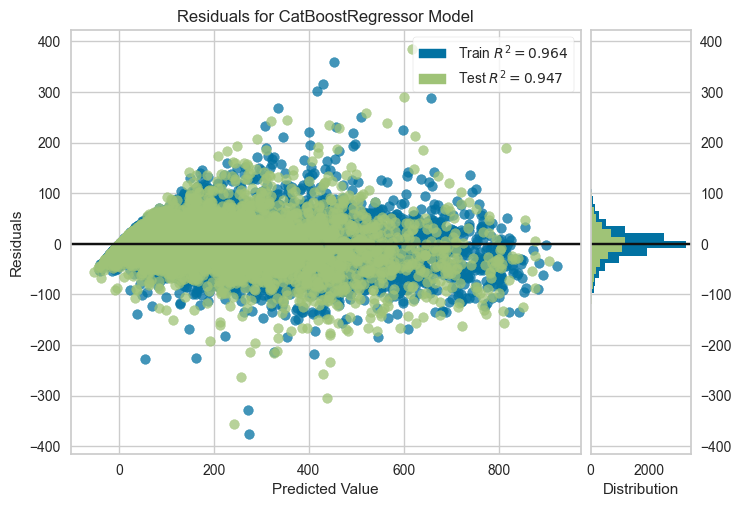

In [94]:
# plot residuals
plot_model(best, plot = 'residuals')

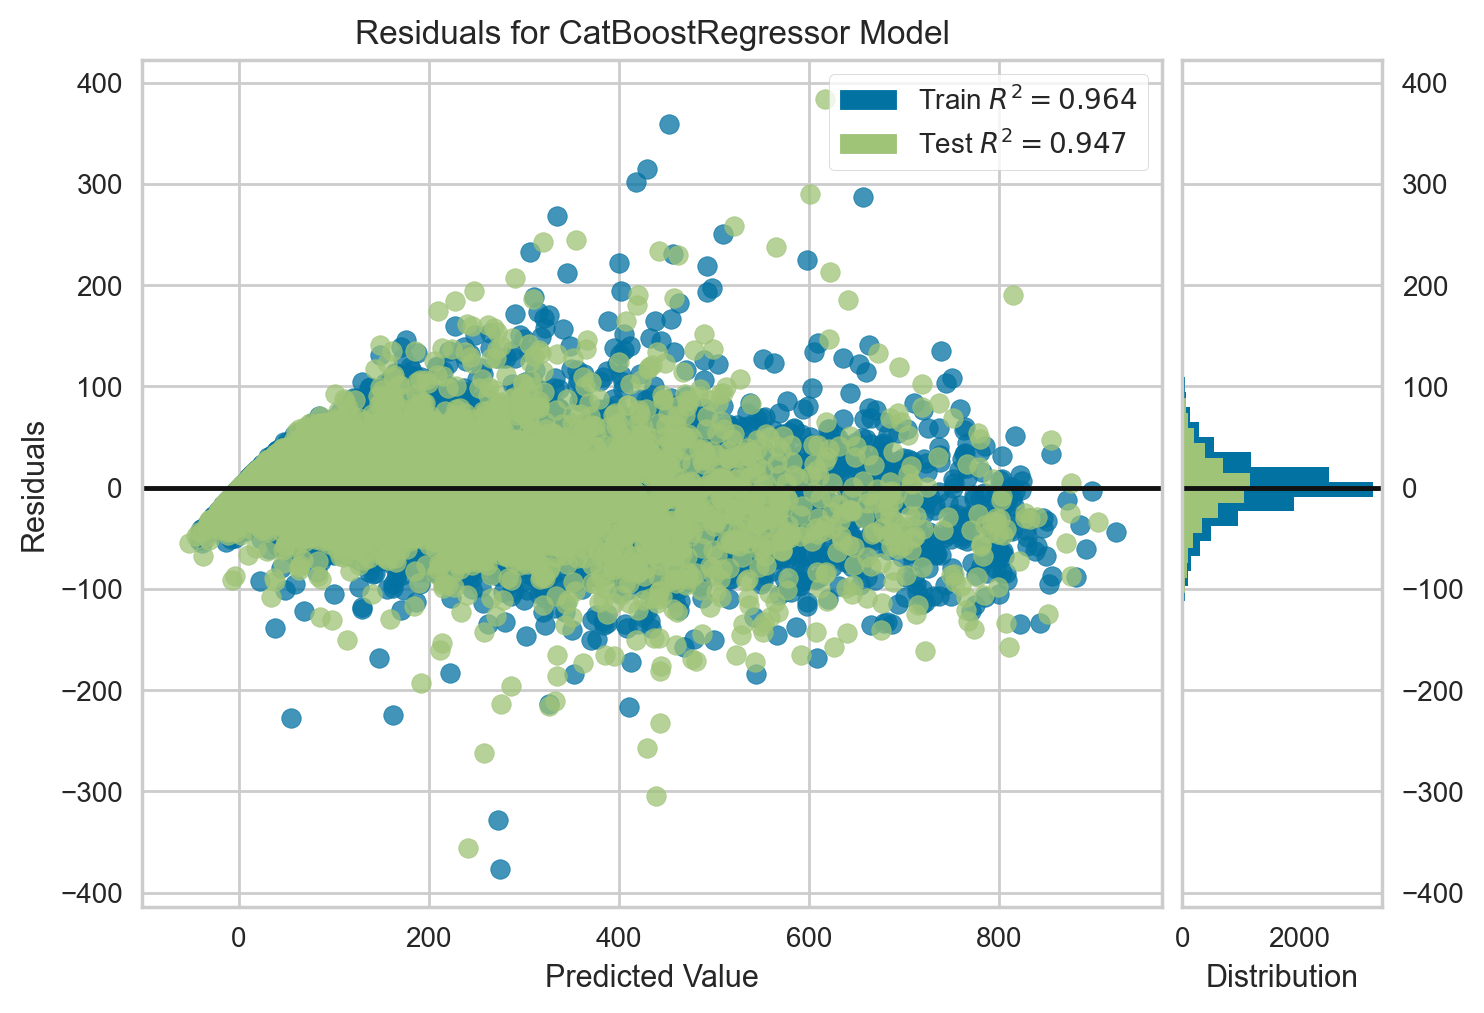

In [95]:
# to control the scale of plot
plot_model(best, plot = 'residuals', scale = 2)

In [96]:
# to save the plot
plot_model(best, plot = 'residuals', save=True)

'Residuals.png'

In [97]:
# train lightgbm model
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,32.6192,2281.3061,47.7630,0.9272,0.5406,0.6918
1,32.1421,2264.4595,47.5863,0.9321,0.5692,0.6932
2,32.1011,2302.9066,47.9886,0.9311,0.5496,0.6930
3,32.0390,2410.4045,49.0959,0.9273,0.5200,0.6056
4,29.1343,1753.6715,41.8769,0.9407,0.5467,0.6448
5,31.1052,2242.3926,47.3539,0.9302,0.5446,0.6679
6,33.5776,2747.5670,52.4172,0.9183,0.5331,0.6031
7,30.8268,2200.2543,46.9069,0.9376,0.5575,0.7052
8,32.9186,2496.5297,49.9653,0.9216,0.5519,0.6114


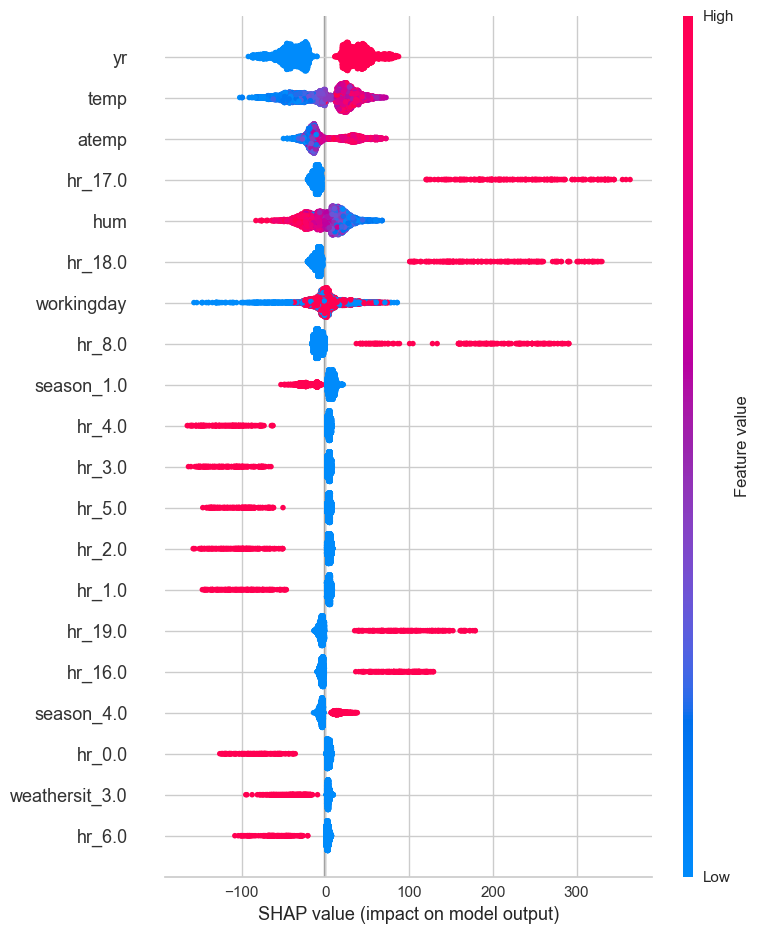

In [98]:
# interpret summary model
interpret_model(lightgbm, plot = 'summary')

In [99]:
# reason plot for test set observation 1
interpret_model(lightgbm, plot = 'reason', observation = 1)

In [100]:
# get leaderboard
lb = get_leaderboard()
lb

,Model Name,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
Index,,,,,,,,
0,Linear Regression,"(TransformerWrapper(include=['temp', 'atemp', ...",2.889671e+10,1.015384e+25,1.007663e+12,-3.095266e+20,1.0650,1.256379e+09
1,Lasso Regression,"(TransformerWrapper(include=['temp', 'atemp', ...",7.665610e+01,1.097141e+04,1.047118e+02,6.638000e-01,1.0218,2.611400e+00
2,Ridge Regression,"(TransformerWrapper(include=['temp', 'atemp', ...",7.520980e+01,1.029971e+04,1.014540e+02,6.843000e-01,1.0327,2.889700e+00
3,Elastic Net,"(TransformerWrapper(include=['temp', 'atemp', ...",1.264008e+02,2.665701e+04,1.632278e+02,1.834000e-01,1.4865,6.567400e+00
4,Least Angle Regression,"(TransformerWrapper(include=['temp', 'atemp', ...",9.136758e+15,1.015121e+36,3.186096e+17,-3.094464e+31,3.8332,3.972503e+14
...,...,...,...,...,...,...,...,...
61,Decision Tree Regressor,"(TransformerWrapper(include=['temp', 'atemp', ...",3.529750e+01,3.198628e+03,5.647130e+01,9.021000e-01,0.4956,5.843000e-01
62,Decision Tree Regressor,"(TransformerWrapper(include=['temp', 'atemp', ...",3.374750e+01,3.206096e+03,5.648300e+01,9.018000e-01,0.4371,4.350000e-01
63,Voting Regressor,"(TransformerWrapper(include=['temp', 'atemp', ...",2.687440e+01,1.887811e+03,4.334280e+01,9.422000e-01,0.4441,4.595000e-01


In [101]:
# select the best model based on MAE
lb.sort_values(by='MAE', ascending=True)['Model'].iloc[0]

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['temp', 'atemp', 'hum',
                                             'windspeed'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['season', 'yr', 'mnth', 'hr',
                                             'holiday', 'weekday', 'workingday',
                                             'weathersit'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('ordinal_enco...
                                                             interaction_constraints=None,
                                                             learning_rate=None,
                                                             max_bin=None,
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=None,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=None,
                                                             n_jobs=-1,
                                                             num_parallel_tree=None, ...))],
                                   final_estimator=LinearRegression(n_jobs=-1),
                                   n_jobs=-1)]])

In [102]:
automl()

LinearRegression(n_jobs=-1)

In [1]:
metrics = pull()
print(metrics[['MAE', 'MSE', 'RMSE', 'R2']])


NameError: name 'pull' is not defined